In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, solve_ivp, RK45

In [2]:
# V = [Vr, Vϕ, Bϕ] 
def model(V,r):
    K = -0.1;
    m = 1e4;
    Vt = 0.0;
    a = 0.1;
    # U parameter
    γ = 1/(np.sqrt(1 - (V[0]**2 + V[1]**2)))   # !
    U0 = γ                                # !
    Ur = γ*V[0]                       # !
    
    ###############
    # ===============================
    Γtt_t = 0  # (1)
    Γtr_t = (m * r * (r**5 + 2 * m * r**4 - 2 * m * a**2 * r**2 ))\
    /(r**4 * (r**4 - 4 * m**2 * r**2 + 4 * a**2 * m**2 )); # (2)
    Γtϕ_t = 0; # (3)
    Γtz_t = 0;  # (4)
    # ================================
    Γrt_t = ((m * r**3) * (r**3 + 2 * r**2 * m - 2 * m * a**2) )\
    /(r**4 * (r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2)); # (5)
    Γrr_t = 0;  # (6)
    Γrϕ_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);   # (7)
    Γrz_t = 0 ; # (8)
    # =================================
    Γϕt_t = 0; # (9)
    Γϕr_t = -(m * a * r * (3 * r + 4 * m))\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 + m**2 );  # (10)
    Γϕϕ_t = 0;  # (11)
    Γϕz_t = 0;  # (12)
    # ==================================
    Γzt_t = 0;  # (13)
    Γzr_t = 0;  # (14)
    Γzϕ_t = 0;  # (15)
    Γzz_t = 0;  # (16)
    # ==================================
    Γtt_r = (m)/(r * (r**2 + 2*m));  # (17)
    Γtr_r = 0;  # (18)
    Γtϕ_r = - (m * a)/(r * (r + 2 * m));  # (19)
    Γtz_r = 0;  # (20)
    # =================================
    Γrt_r = 0;  # (21)
    Γrr_r = - (m)/(r * (r + 2 * m));  # (22)
    Γrϕ_r = 0;   # (23)
    Γrz_r = 0;  # (24)
    # =================================
    Γϕt_r = -(m * a)/(r * (r + 2 * m));  # (25)
    Γϕr_r = 0;  # (26)
    Γϕϕ_r = -(r * (r + m))/(r + 2 * m); # (27)
    Γϕz_r = 0; # (28)
    # ================================
    Γzt_r = 0; # (29)
    Γzr_r = 0; # (30)
    Γzϕ_r = 0; # (31)
    Γzz_r = (m)/(r * (r + 2 * m)); # (32)
    # =================================
    Γtt_ϕ = 0; # (33)
    Γtr_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (34)
    Γtϕ_ϕ = 0; # (35)
    Γtz_ϕ = 0; # (36)
    # ==================================
    Γrt_ϕ = (a * m)/(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (37)
    Γrr_ϕ = 0; # (38)
    Γrϕ_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2); # (39)
    Γrz_ϕ = 0; # (40)
    # ==================================
    Γϕt_ϕ = 0;  # (41)
    Γϕr_ϕ = -(r**3 * m - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2)\
    /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2);  # (42)
    Γϕϕ_ϕ = 0;  # (43)
    Γϕz_ϕ = 0;  # (44)
    # ==================================
    Γzt_ϕ = 0;  # (45)
    Γzr_ϕ = 0;  # (46)
    Γzϕ_ϕ = 0;  # (47)
    Γzz_ϕ = 0;  # (48)
    # ================================
    Γtt_z = 0;  # (49)
    Γtr_z = 0;  # (50)
    Γtϕ_z = 0;  # (51)
    Γtz_z = 0;  # (52)
    # ====================================
    Γrt_z = 0;  # (53)
    Γrr_z = 0;  # (54)
    Γrϕ_z = 0;  # (55)
    Γrz_z = -(m)/(r * (r + 2 * m));  # (56)
    # =================================
    Γϕt_z = 0;  # (57)
    Γϕr_z = 0;  # (58)
    Γϕϕ_z = 0;  # (59)
    Γϕz_z = 0;  # (60)
    # ====================================
    Γzt_z = 0;  # (61)
    Γzr_z = -(m)/(r * (r + 2 * m));  # (61)
    Γzϕ_z = 0;  # (61)
    Γzz_z = 0;  # (61)
    # ======================================
    # initial state 
    Vr = V[0]
    Vϕ = V[1]
    Bϕ = V[2]
    

    

    # Vϕ Conputation
    dVϕ_dr = (-1.0/V[0])*((2*V[0]*(Γtr_ϕ - Γtr_t*V[1]))+\
#                           V[0]*V[2]*(Γrt_ϕ - Γrt_t*V[1]) +\
                          V[0]*V[1]*(Γϕr_ϕ - Γϕr_t*V[1])+\
                          V[0]*V[1]*(Γϕr_ϕ - Γϕr_t*V[1])+\
                          V[0]*V[1]*(Γrϕ_ϕ - Γrϕ_t*V[1]))
    
    
    L1 = Γtt_r - 2 * Γtr_t * V[0]*V[0] + 2 * V[1] * Γtϕ_r + \
    Vt*V[0]*(Γrt_t - Γrt_t * V[0]) + \
    (V[0] * V[0] * Γrr_r) - (Γϕr_t * V[0] * V[0] * V[1]) - \
    (Γrϕ_t * V[0] * V[0] * V[1]) + (Γϕϕ_r * V[1] * V[1])
    
    L2 = V[0] * (Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) + \
    V[0] * (Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) - \
    V[0] * V[1] * (Γrϕ_t + Γϕr_t)
    
    
    dBϕ_dr = ( 1/(V[2]*(1+2*Ur*U0))) * ((r**1.5 + K*r**2.5) * U0**2 * (L1) - \
                ((r**1.5 + r**2.5)**2) * U0**2 * (1/4*r) * (L2)* V[0] + \
                2.5 * r**1.5 * (1 + 2*m/r))  - \
                V[2] * (1/r + 1/r**2)
    
    
    Jz = -V[2] * (1/r + 1/r**2) - dBϕ_dr
#     Jz = -(V[2])/(r) - dBϕ_dr - V[2]*(1/r**2 -\
#         (m/(r*(r + 2 * m)))*(1 + (m*r**3 - r**4 + 2 * r**2 * m**2 + 2 * a**2 * m**2 )\
#                              /(r**4 - 4 * r**2 * m**2 + 4 * a**2 * m**2)))
                                                    
    
    dVr_dr = -(V[0]*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t +\
                    Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) -\
               V[0]*V[1]*(Γrϕ_t + Γϕr_t)) -\
    V[0]*((1.5 * r**0.5 - 2.5 * K * r**1.5)/(r**1.5 + K * r**2.5)) 
#     -\
#     (2 * Ur * U0 * V[2] * Jz)/(U0**2)
    
    
    
    # Bϕ
#     L1 = Γtt_r - 2 * Γtr_t * V[0]*V[0] + 2 * V[1] * Γtϕ_r + \
#     Vt*V[0]*(Γrt_t - Γrt_t * V[0]) + \
#     (V[0] * V[0] * Γrr_r) - (Γϕr_t * V[0] * V[0] * V[1]) - \
#     (Γrϕ_t * V[0] * V[0] * V[1]) + (Γϕϕ_r * V[1] * V[1])
    
#     L2 = V[0] * (Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) + \
#     V[0] * (Γrz_r + Γϕz_ϕ + Γzz_z - Γzt_t) - \
#     V[0] * V[1] * (Γrϕ_t + Γϕr_t)
                # 1/V[2]
#     dBϕ_dr = ( 1/(V[2]*(1+2*Ur*U0))) * ((r**1.5 + K*r**2.5) * U0**2 * (L1) - \
#                     ((r**1.5 + r**2.5)**2) * U0**2 * (1/4*r) * (L2)* V[0] + \
#                     2.5 * r**1.5 * (1 + 2*m/r))  - \
#                     V[2] * (1/r + 1/r**2)
#         # Vr Computation
#     dVr_dr = -V[0]*((1.5*np.power(r,0.5) - \
#                    2.5*K*np.power(r,1.5))/(np.power(r,1.5)+K*np.power(r,2.5))) + \
#                    (((-2.0/(U0)**2)*(1.0/(np.power(r,3/2)+K*np.power(r,5/2))))) + \
#     -V[0]*(Γrr_r + Γϕr_ϕ + Γzr_z - Γrt_t) - V[0]*(Γrz_r + Γϕz_ϕ + Γzz_z -Γzt_t) + \
#     -Γrϕ_t*V[1]*V[0] + Γϕr_t*V[0]*V[1]
    
    
    # Desired return
    dVdr = [dVr_dr,dVϕ_dr,dBϕ_dr]
    return dVdr

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[50:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
# plt.plot(t,u,'g:',label='u(t)')
# plt.plot(t,x,'b-',label='x(t)')
# plt.plot(t,y,'r--',label='y(t)')
# plt.ylabel('values')
# plt.xlabel('time')
# plt.legend(loc='best')
# plt.show()
y.shape

(401,)

In [4]:
r = np.linspace(4,100)
Vr0 = 0.12;
Vϕ0 = 0.918;
Bϕ0 = 1e4;
V1 = odeint(model,[Vr0,Vϕ0,Bϕ0],r)

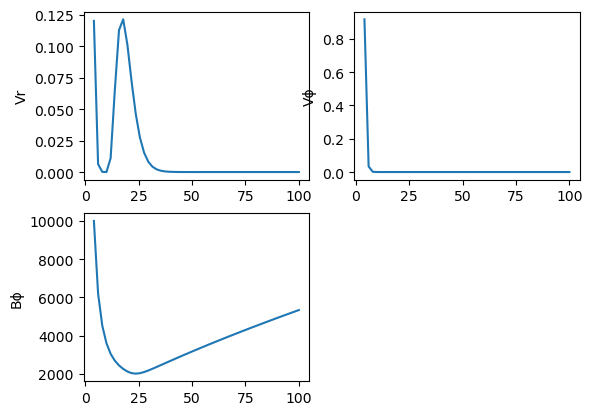

In [6]:
plt.subplot(221)
# plt.xlabel('r')
plt.ylabel('Vr')
plt.plot(r,V1[:,0])
plt.subplot(222)
plt.ylabel('Vϕ')
plt.plot(r,V1[:,1])
plt.subplot(223)
plt.ylabel('Bϕ')
plt.plot(r,V1[:,2])
plt.show()

In [12]:
from scipy.integrate import RK45  

In [11]:
y0 = np.array([0.12, 0.918, 1e4])
RK45(model,t0=4,y0=y0,t_bound=10,rtol=1e-3,vectorized=True)

TypeError: 'int' object is not subscriptable

In [7]:
r = np.linspace(4,10,50)
# Vr0 = [0.12];
# Vϕ0 = [0.918];
# Bϕ0 = [1e4];
y0 = np.array([0.12, 0.918, 1e4])
# y0 = [1,2,3]
# 1E4
v0 = 
v2 = solve_ivp(lambda r,y: model(r,V), [r[0], r[-1]], y0
               , t_eval=r,vectorized=True ,rtol=1e-3)
# V = odeint(model,[Vr0,Vϕ0,Bϕ0],r) [Vr0,Vϕ0,Bϕ0]

SyntaxError: invalid syntax (2436251452.py, line 8)

In [8]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,V[:,0],c='b')
plt.title("Vr-r")
plt.xlabel("r")
plt.ylabel("Vr")
plt.ylim(-0.001,0.130)
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0,0.14,0.01))
plt.show()
# plt.savefig("Vr")

NameError: name 'V' is not defined

<Figure size 10800x5400 with 0 Axes>

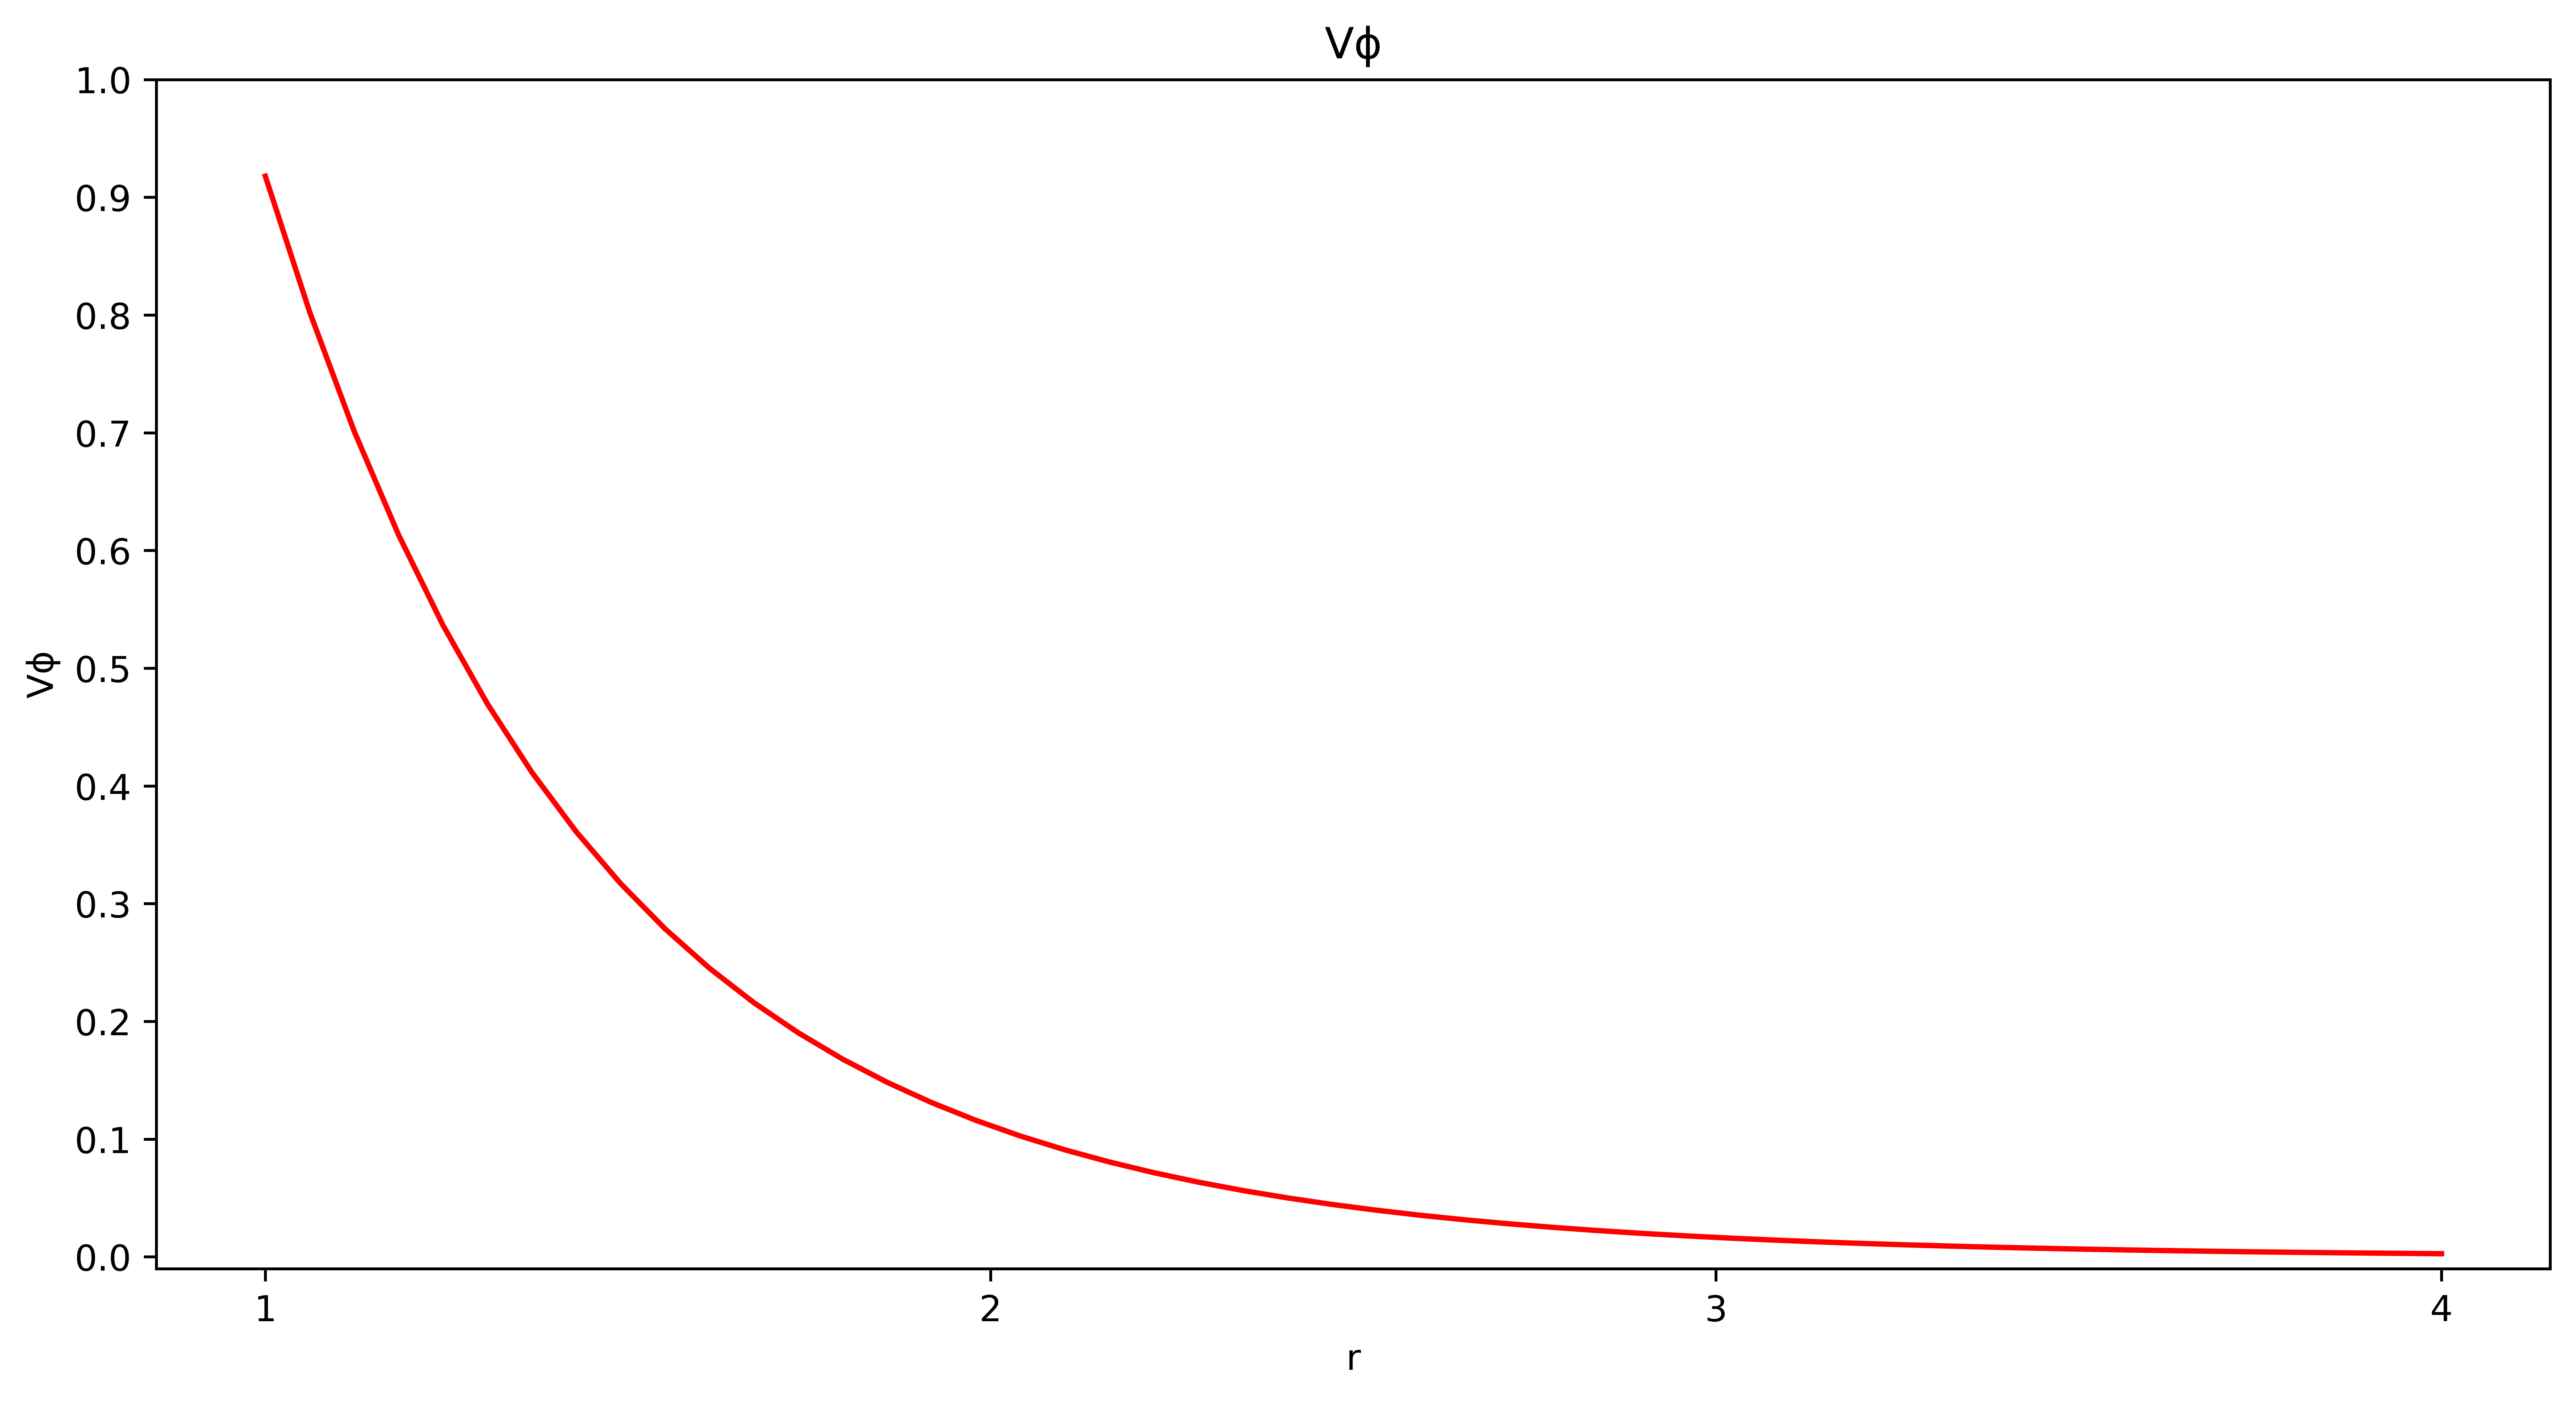

In [137]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r, V[:,1],c='r')
plt.title("Vϕ")
plt.xlabel("r")
plt.ylim(-0.01, 1.0)
plt.ylabel("Vϕ")
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0,1.1,0.1))
# plt.show()
plt.savefig("Vϕ")

In [138]:
plt.figure(figsize=(12,6), dpi=1200)
plt.plot(r,V[:,0],'-b*',label="Vr")
plt.plot(r, V[:,1],'-r*', label="Vϕ")
plt.title("Vr-vs-Vϕ  (r)")
plt.xlabel("r")
plt.legend(["Vr","Vϕ"], loc="upper right")
plt.ylim(-0.01, 1.0)
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(0,1.1,0.1))
# plt.show()
plt.savefig("Vr_Vϕ")

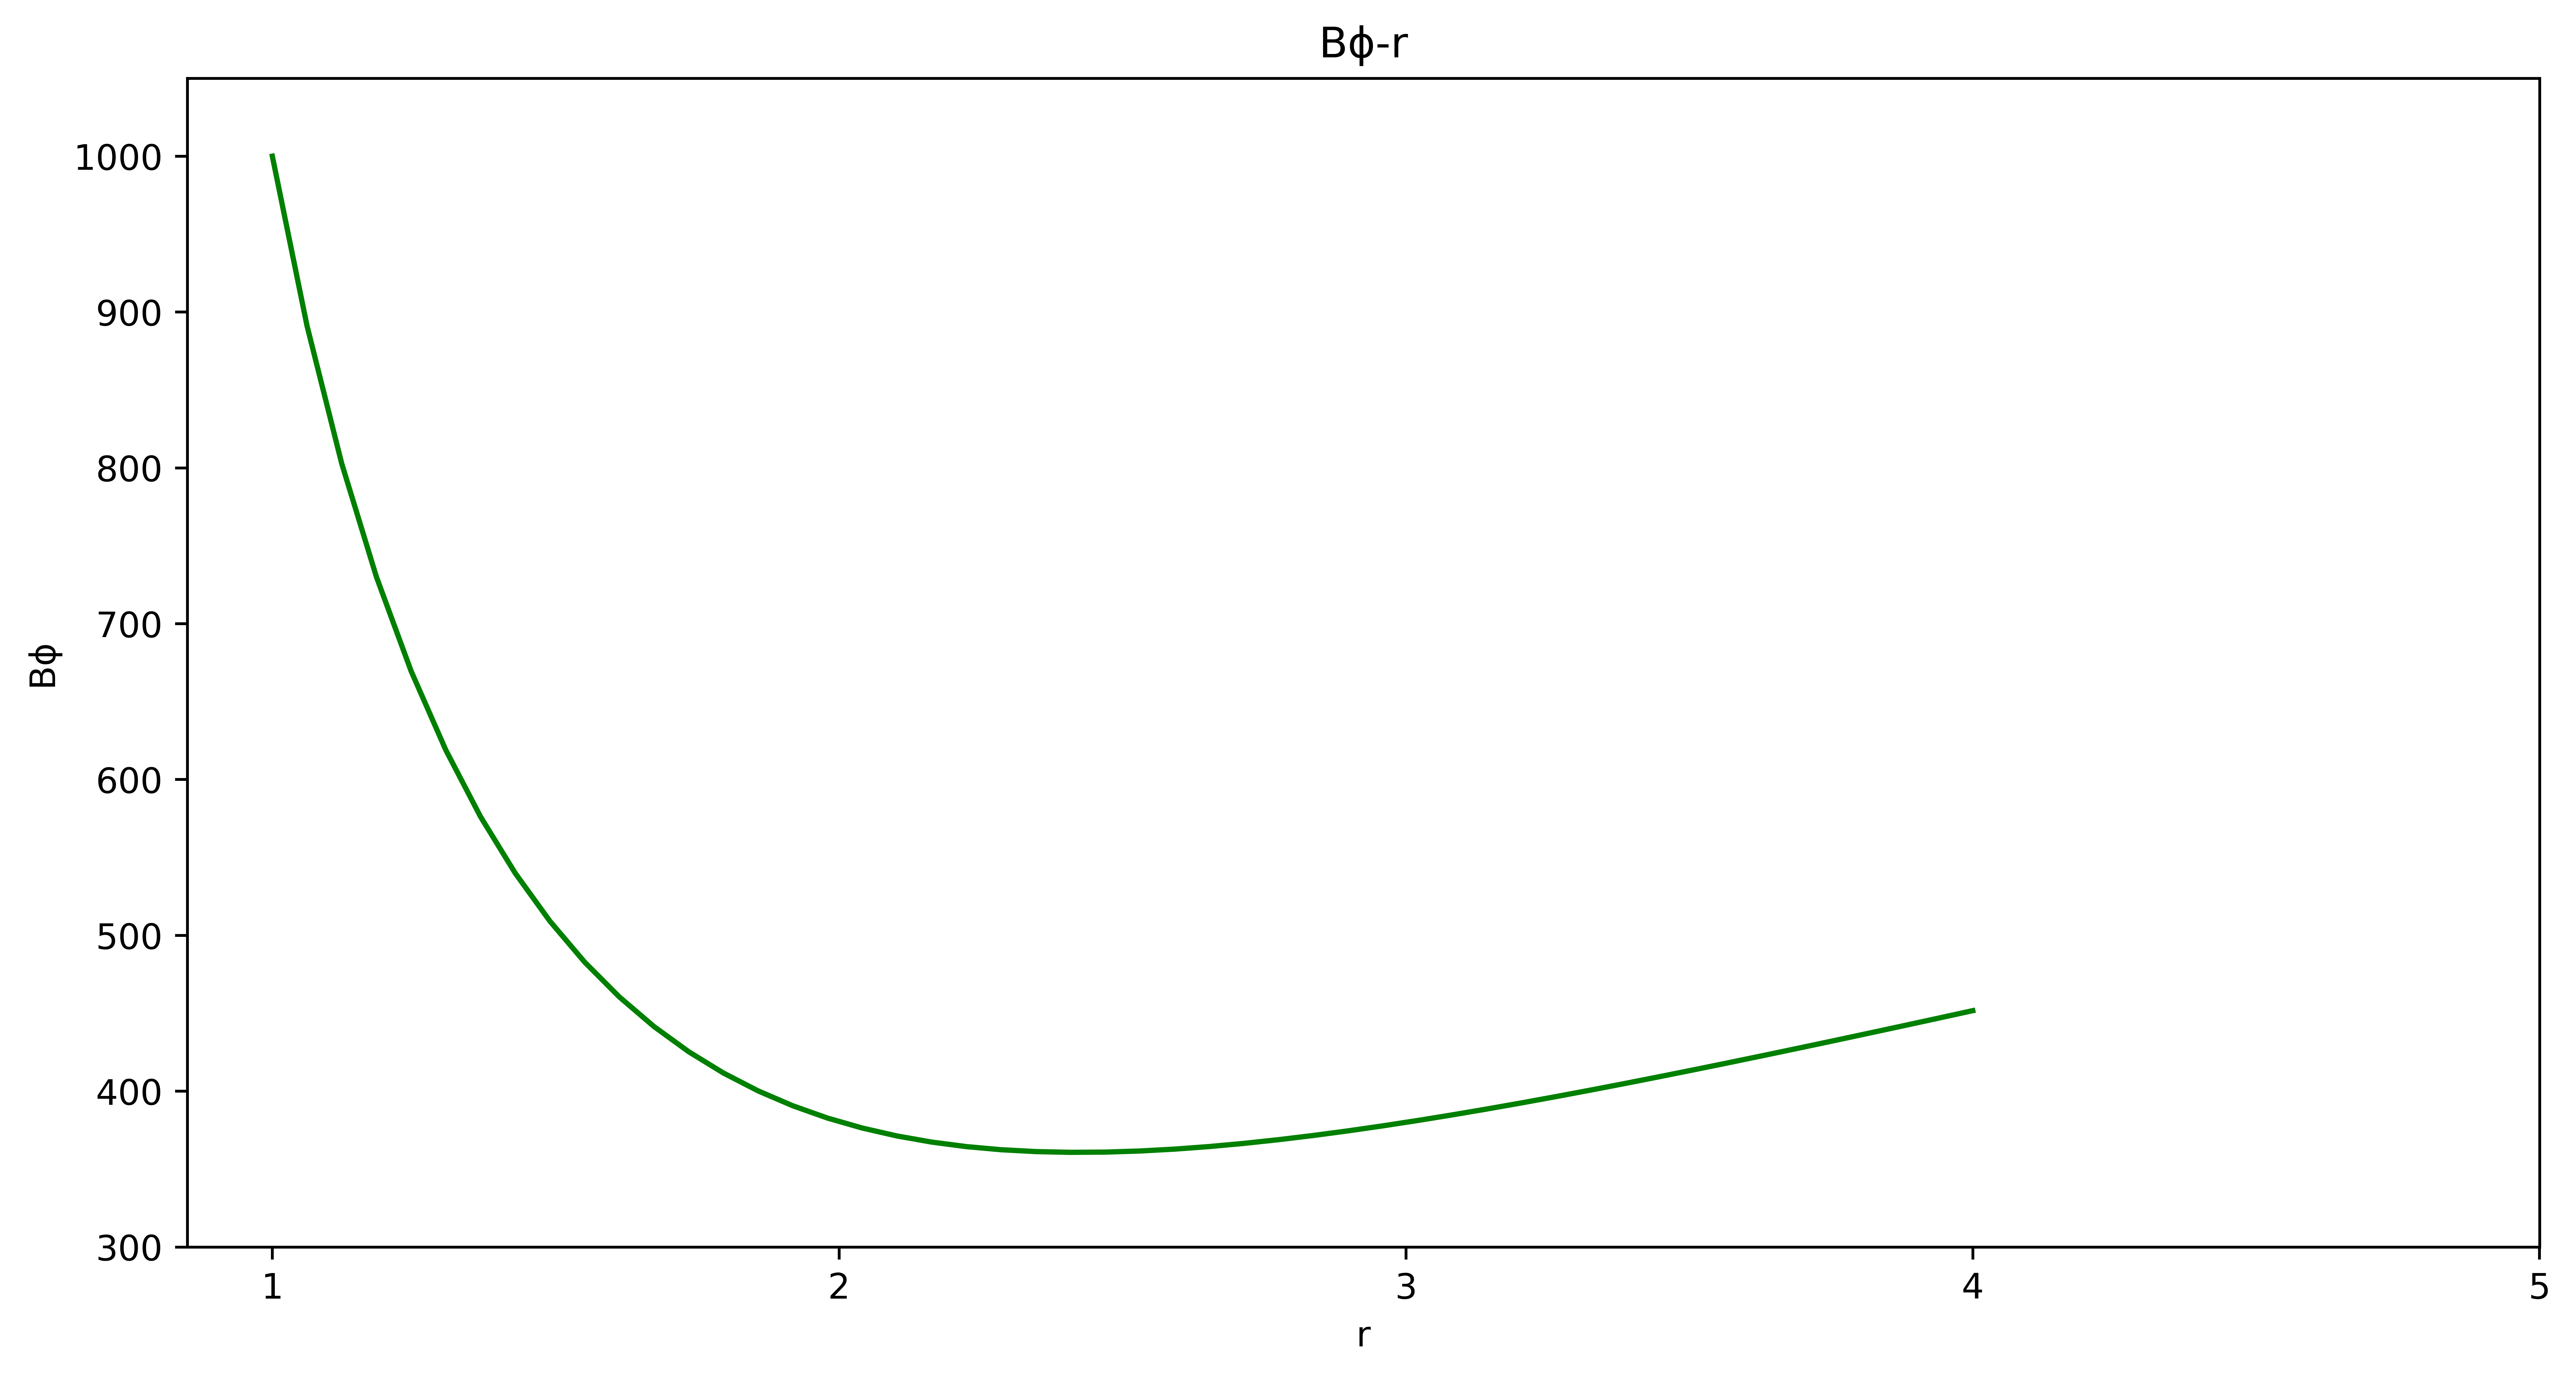

In [144]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,V[:,2],c='g')
plt.xlabel("r")
plt.ylabel("Bϕ")
plt.title("Bϕ-r")
plt.ylim(300,1050)
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(300,1100,100))
# plt.show()
plt.savefig("Bϕ")

In [45]:
γ = 1/np.sqrt(1 - (V[:,0]**2 + V[:,1]**2))

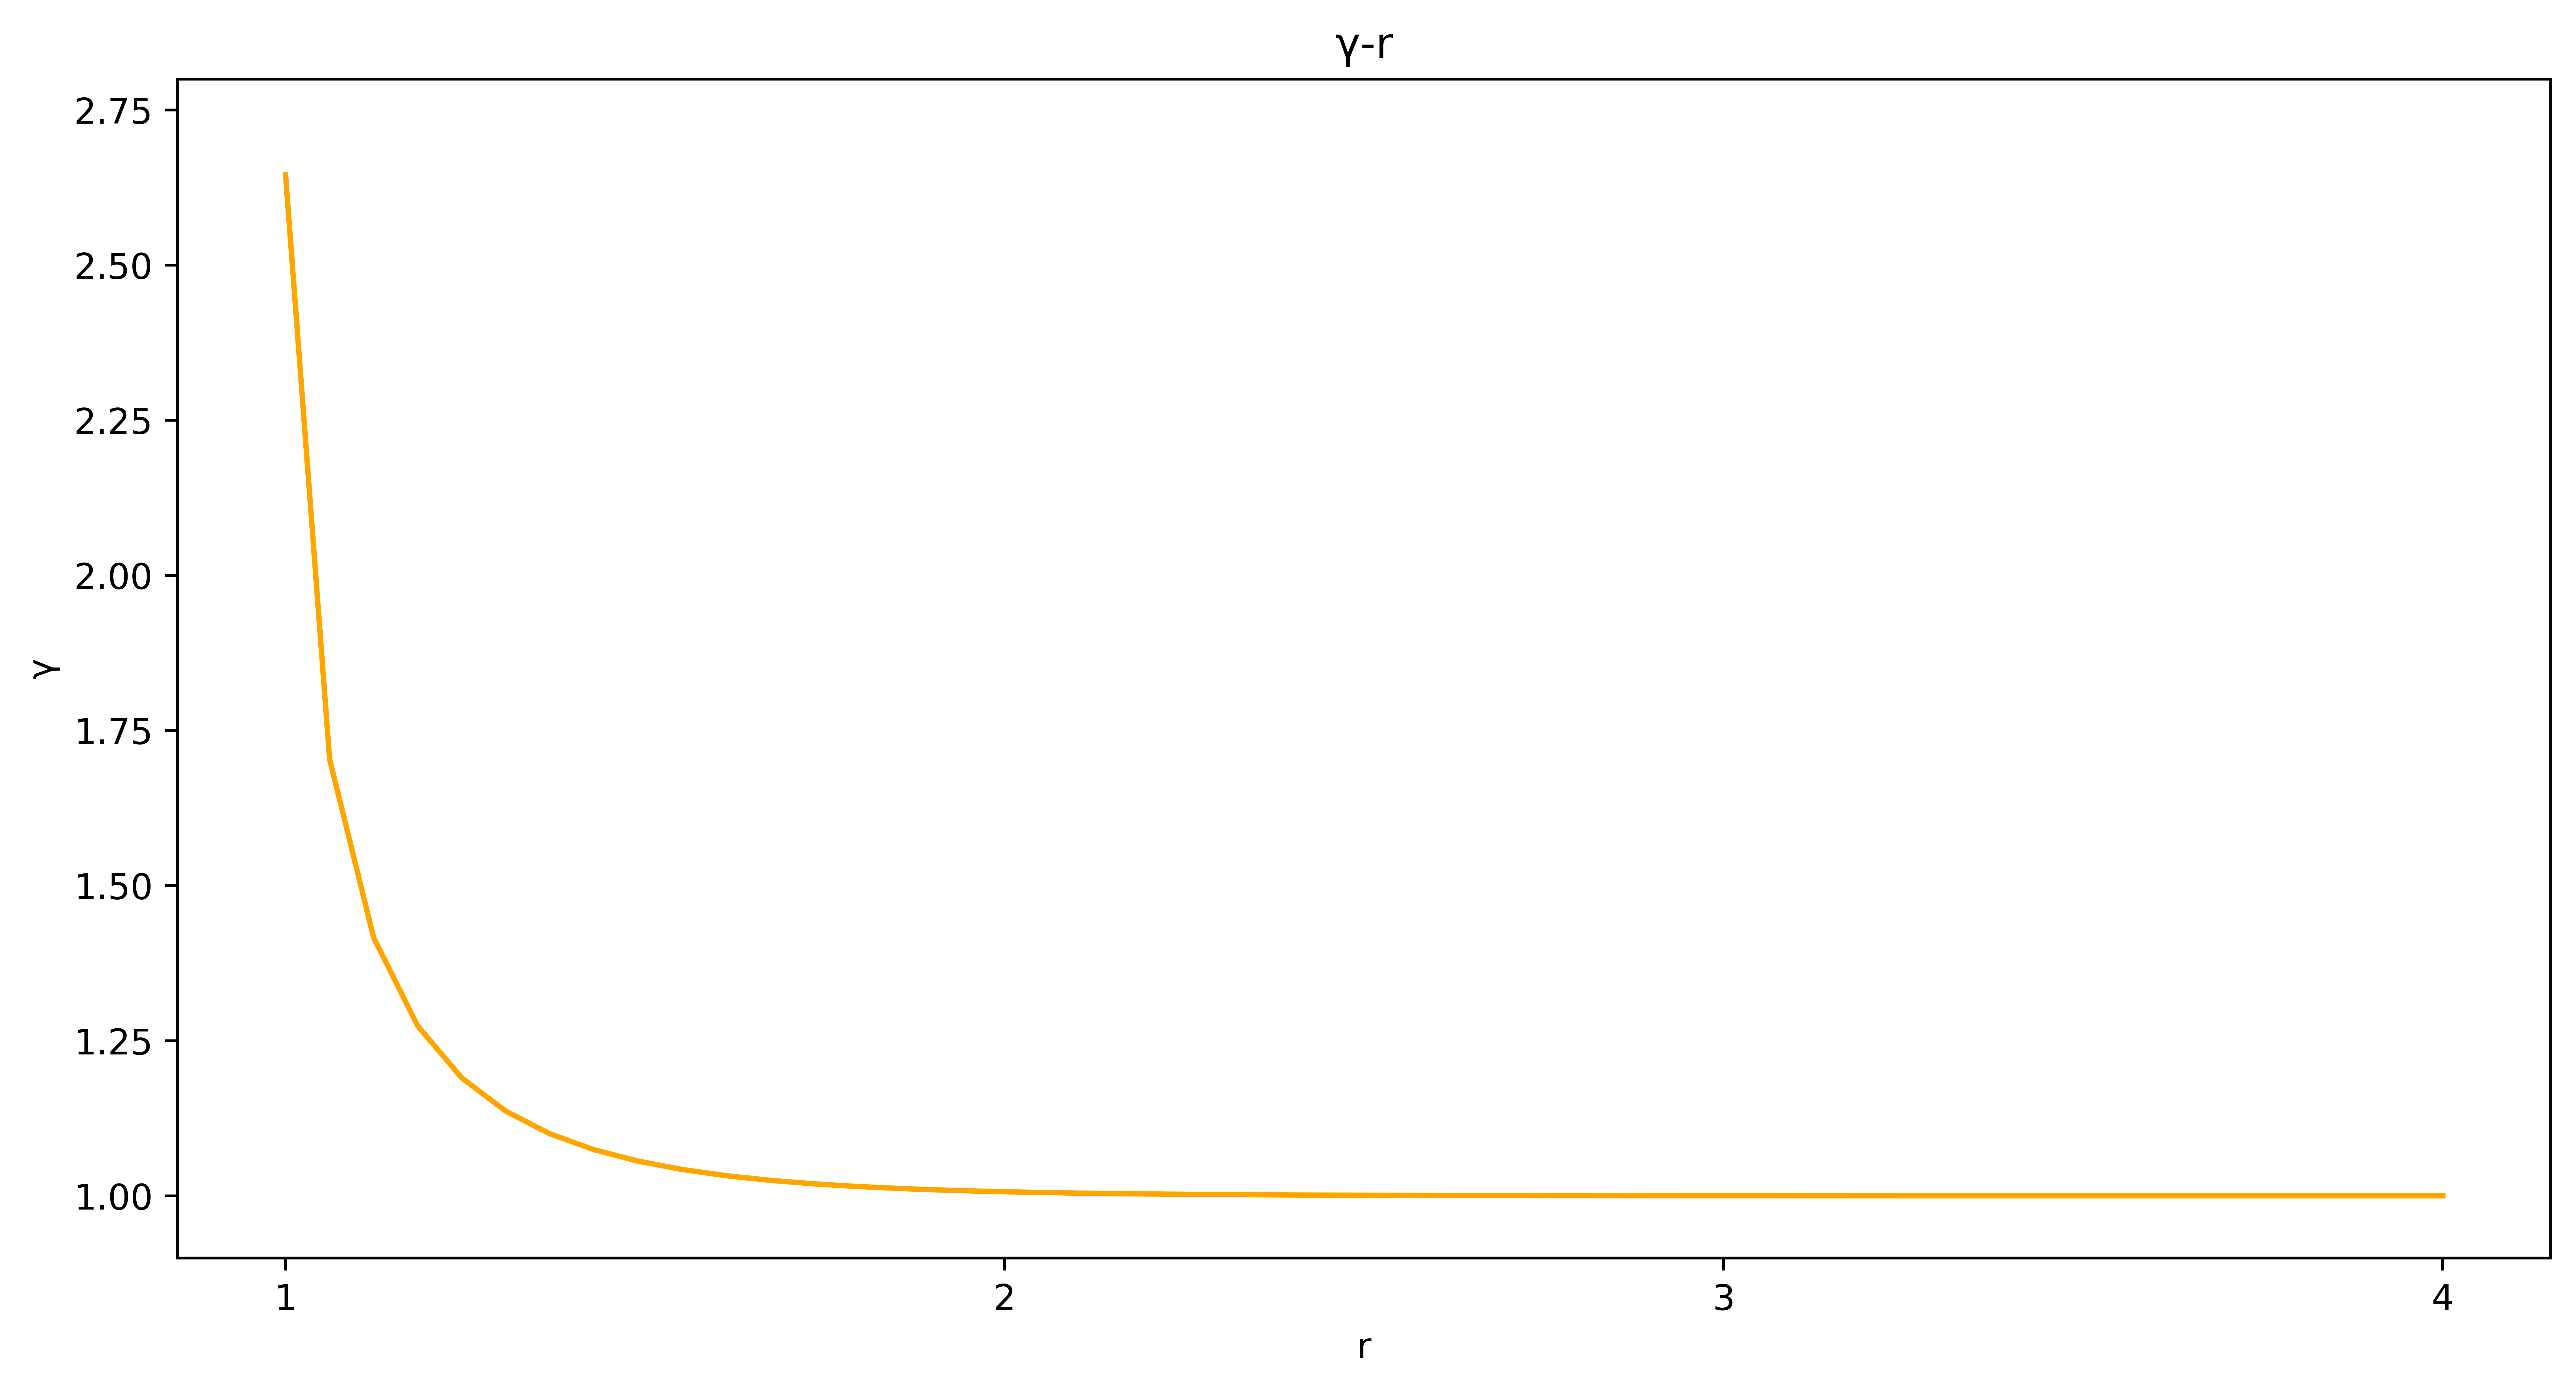

In [149]:
plt.figure(figsize=(12,6), dpi=900)
plt.plot(r,γ,c='orange')
plt.xlabel("r")
plt.ylabel("γ")
plt.title("γ-r")
plt.ylim(0.9,2.80)
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(1,3,0.25))
# plt.show()
plt.savefig("γ")

In [15]:
import numpy as np

from scipy.integrate import solve_ivp

def exponential_decay(t, y): return -0.5 * y

In [26]:
sol = solve_ivp(exponential_decay, [0, 10],[2,4])

In [27]:
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11487845,  1.26366294,  3.06066931,  4.81621568,
        6.5746946 ,  8.33384308, 10.        ])
 t_events: None
        y: array([[2.        , 1.88835854, 1.06326058, 0.43318199, 0.18016314,
        0.07482164, 0.03106302, 0.01350781],
       [4.        , 3.77671709, 2.12652116, 0.86636399, 0.36032628,
        0.14964327, 0.06212604, 0.02701562]])
 y_events: None


In [28]:
sol.y.shape

(2, 8)